### Paquetes utilizados

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### DataSet a utilizar.

In [3]:
data = np.load ('proyecto_training_data.npy')
print (data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


### Se convierte a un DataFrame para mejor manejo

In [4]:
dataset = pd.DataFrame(data, columns = ['SalesPrice','OverallQual','lstFirSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dataset

,SalesPrice,OverallQual,lstFirSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Se separa en un 80% de entranamiento y un 20% prueba

In [8]:
porc1 = slice(0,1168,1)
porc2 = slice(1168,1460,1) 
Entrena = dataset[porc1] 
Prueba = dataset[porc2]

### Analisis Exploratorio

#### Media por cada variable

In [9]:
media = np.mean(Entrena, 0)
media

SalesPrice      180590.277397
OverallQual          6.101027
lstFirSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64

#### Valor Maximo

In [10]:
np.amax(Entrena, 0)

SalesPrice      755000.0
OverallQual         10.0
lstFirSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

#### Valor Minimo

In [51]:
np.amin(ochenta, 0)

SalesPrice      34900.0
OverallQual         1.0
lstFirSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64

#### Rango peak to peak

#### Desviación estándar

In [11]:
np.std(Entrena, 0)

SalesPrice      78781.951080
OverallQual         1.377435
lstFirSF          373.620332
TotRmsAbvGrd        1.608452
YearBuilt          29.938882
LotFrontage        23.465955
dtype: float64

### Histograma por Variable 

#### SalesPrice

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


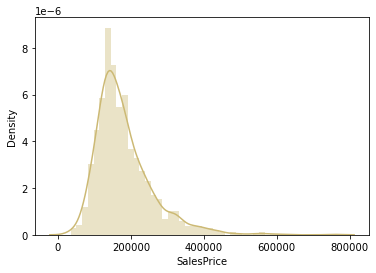

In [64]:
Sal = Entrena.iloc[:, 0]
sns.set_color_codes()
ax = sns.distplot(Sal, color="y")

#### OverallQual

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


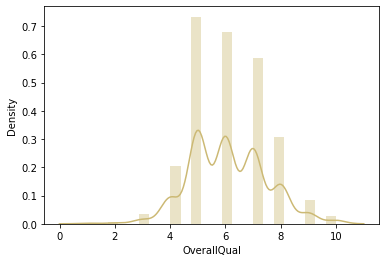

In [13]:
Ove = Entrena.iloc[:, 1]
sns.set_color_codes()
ax = sns.distplot(Ove, color="y")

#### lstFirSF

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


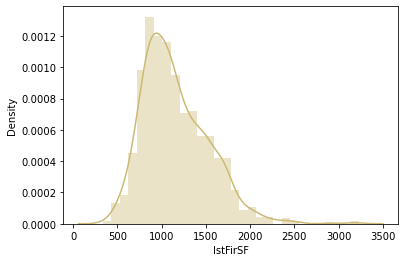

In [65]:
Ist = Entrena.iloc[:, 2]
sns.set_color_codes()
ax = sns.distplot(Ist, color="y")

#### TotRmsAbvGrd

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


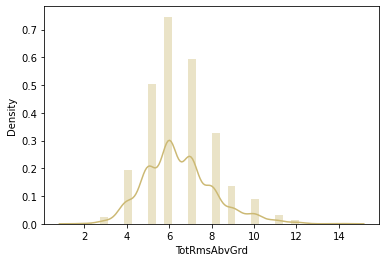

In [66]:
Tot = Entrena.iloc[:, 3]
sns.set_color_codes()
ax = sns.distplot(Tot, color="y")

#### YearBuilt

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


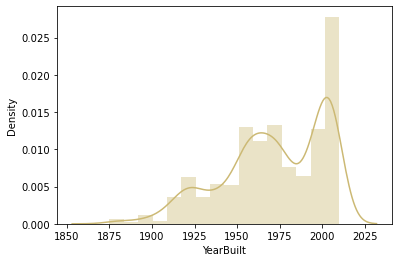

In [67]:
Year = Entrena.iloc[:, 4]
sns.set_color_codes()
ax = sns.distplot(Year, color="y")

#### LotFrontage

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


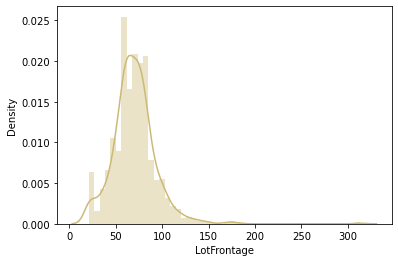

In [68]:
Lot = Entrena.iloc[:, 5]
sns.set_color_codes()
ax = sns.distplot(Lot, color="y")

### Calculos por cada una de las variables independientes.

#### Coeficiente de correlación

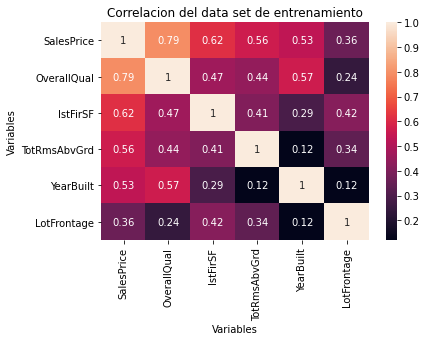

In [29]:
Entrena_small = Entrena.iloc[:,:6]
correlacion_mat = Entrena_small.corr()
sns.heatmap(correlacion_mat, annot = True)
plt.title("Correlacion del data set de entrenamiento")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

#### Grafica de puntos por x, y

##### OverallQual-SalesPrice

Text(0.5, 1.0, 'LotFrontage-YearBuilt')

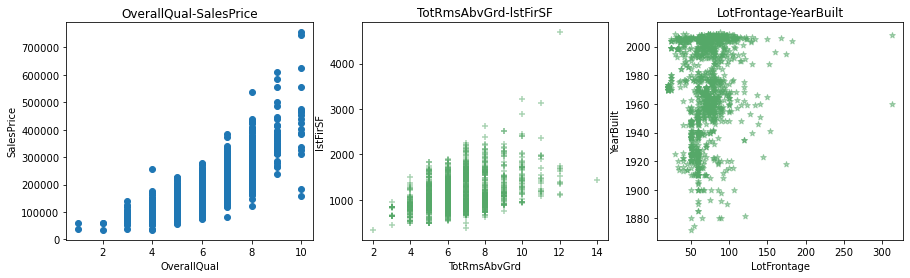

In [56]:
f, [p1, p2, p3] = plt.subplots(1,3)
f.set_figwidth(15)

p1.scatter(dataset['OverallQual'],dataset['SalesPrice'])
p1.set_xlabel("OverallQual")
p1.set_ylabel("SalesPrice")
p1.set_title("OverallQual-SalesPrice")

p2.scatter(dataset['TotRmsAbvGrd'],dataset['lstFirSF'],
            c="g", alpha=0.5, marker= r'+')
p2.set_xlabel("TotRmsAbvGrd")
p2.set_ylabel("lstFirSF")
p2.set_title("TotRmsAbvGrd-lstFirSF")

p3.scatter(dataset['LotFrontage'],dataset['YearBuilt'],
            c="g", alpha=0.5, marker= r'*')
p3.set_xlabel("LotFrontage")
p3.set_ylabel("YearBuilt")
p3.set_title("LotFrontage-YearBuilt")


#### Grafica de dispercion con el coeficiente de correlación

In [45]:
lr_1 = LinearRegression ()
predict_Entrena = lr_1.predict(Entrena)
plt.scatter(Entrena['OverallQual'],Entrena['SalesPrice'])
plt.plot(Entrena,predic_Entrena, color = 'red', linewidth = 2)
plt.show()

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Generación del modelo por gradientes

#### Split de Sets Train y Test

In [70]:
# Variables X y Y para Prueba de la función
x = dataset['OverallQual'].values.reshape(-1, 1)
y = dataset['SalesPrice'].values.reshape(-1, 1)

In [71]:
split = 0.8
nTrain = int(len(x)*split)
Indices = list(range(0, len(x)))
random.seed(123)
random.shuffle(Indices)
TrainSet_x = x[Indices[0 : nTrain]]
TestSet_x = x[Indices[nTrain : len(Indices)]]
TrainSet_y = y[Indices[0 : nTrain]]
TestSet_y = y[Indices[nTrain : len(Indices)]]

#### Creación de la función

In [72]:
# Variables
X = TrainSet_x
Y = TrainSet_y

#parametros de la función
epoch = 50000
imprimir_error_cada = 10000
learning_rate = 0.01

#parametros internos
b0 = 0
b1 = 0
betas = np.array([b1,b0]) 
n = len(X)

#arrays iniciales
errorArray = np.array([])
betasArray = ([betas])

vect1 = np.ones_like(X)
matriz = np.hstack([X, vect1])

for i in range(epoch):
    yhat = np.dot(matriz, betas).reshape(-1,1)
    
    error = np.sum(np.power(Y - yhat, 2))/(2*n)
    errorArray = np.append(errorArray, error)
    
    grads = np.sum((yhat-Y)*matriz,axis=0)*1/n
    
    betas = betas - learning_rate*grads
    betasArray = np.vstack([betasArray, betas])
    
    if (i+1) % imprimir_error_cada == 0:
        print('------------------------')
        print('iteracion {}'.format(i+1))
        print('error {}'.format(error))
        print('modelo b0: {}, b1: {}'.format(betas[1], betas[0]))
    else:
        pass

------------------------
iteracion 10000
error 1155517839.1261802
modelo b0: -97263.14357587117, b1: 45507.19329085135
------------------------
iteracion 20000
error 1155498259.9263356
modelo b0: -98153.09036901817, b1: 45645.66279870509
------------------------
iteracion 30000
error 1155498258.4322772
modelo b0: -98160.86447275669, b1: 45646.87239497193
------------------------
iteracion 40000
error 1155498258.4321632
modelo b0: -98160.93238320871, b1: 45646.88296136414
------------------------
iteracion 50000
error 1155498258.4321632
modelo b0: -98160.93297643853, b1: 45646.88305366656


#### Función para graficar error

Text(0, 0.5, 'error')

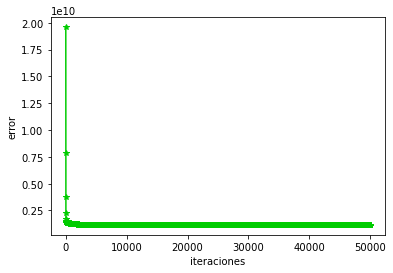

In [73]:
iteraciones = np.arange(1, len(errorArray)+1, 1)
plt.plot(iteraciones, errorArray, color='#00cc00', marker='*')
plt.xlabel('iteraciones')
plt.ylabel('error')

#### Función para graficar la evolución del modelo

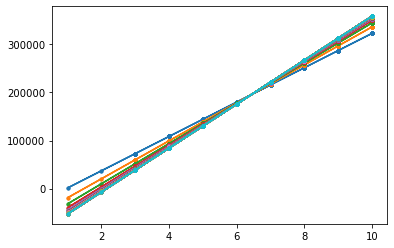

In [74]:
n_grafica = 1000
predDict = {}

for i in range(n_grafica, epoch+1, n_grafica):
    y_pred_temp = np.dot(matriz, betasArray[i]).reshape(-1,1)
    predDict['iteracion {}'.format(i)] = y_pred_temp

for k, v in predDict.items():
    plt.plot(X, v, '.-', label=k)
plt.show()

### Modelo con Scikit-Learn

#### Split de Train y Test

In [76]:
x = dataset['OverallQual'].values.reshape(-1, 1)
y = dataset['SalesPrice'].values.reshape(-1, 1)
dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=123)

#### Entrenamiento del modelo

In [77]:
lm_1 = LinearRegression()
lm_1.fit(dataTrain, dataTrain_Sales)
print(lm_1.coef_)
print(lm_1.intercept_)

[[44976.49429688]]
[-94032.19372475]


In [78]:
y_hat_skl = lm_1.predict(dataTrain)
y_hat_skl

array([[130850.27775967],
       [ 40897.2891659 ],
       [130850.27775967],
       ...,
       [220803.26635344],
       [130850.27775967],
       [175826.77205655]])

### Función para predicción

In [80]:
# Variables
X = TestSet_x
Y = TestSet_y

# Creación del vector para la función de gradientes
vect1 = np.ones_like(X)
matriz = np.hstack([X, vect1])

# Predicciones en cada modelo
ypred_grad = np.dot(matriz, betas).reshape(-1,1)
ypred_skl = lm_1.predict(X)
ypred_prom = (ypred_grad + ypred_skl)/2

# Arreglo con resultados
result = np.array([ypred_grad, ypred_skl, ypred_prom])
print(result)

[[[221367.24839923]
  [175720.36534556]
  [130073.48229189]
  [221367.24839923]
  [130073.48229189]
  [267014.13145289]
  [267014.13145289]
  [175720.36534556]
  [130073.48229189]
  [221367.24839923]
  [175720.36534556]
  [175720.36534556]
  [267014.13145289]
  [175720.36534556]
  [221367.24839923]
  [221367.24839923]
  [175720.36534556]
  [175720.36534556]
  [267014.13145289]
  [130073.48229189]
  [221367.24839923]
  [130073.48229189]
  [130073.48229189]
  [ 84426.59923823]
  [130073.48229189]
  [130073.48229189]
  [175720.36534556]
  [221367.24839923]
  [175720.36534556]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [267014.13145289]
  [175720.36534556]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [130073.48229189]
  [130073.48229189]
  [ 38779.71618456]
  [221367.24839923]
  [130073.48229189]
  [175720.36534556]
  [130073.48229189]
  [130073.48229189]
  [ 84426.59923823]


#### Error de los modelos

In [81]:
error_pred = np.sum(np.power(Y - result, 2), axis = 1)/(2*n)
print(error_pred)

[[3.20417345e+08]
 [3.20153908e+08]
 [3.20258657e+08]]
